<a href="https://colab.research.google.com/github/fauzul91/PKB-Praktikum/blob/main/PKB_6_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

Pertama, dimulai dengan mengimpor kumpulan data teks langsung dari tautan GitHub. Koleksi data teks SMS terdiri dari kumpulan data yang berisi 5.574 teks pesan SMS dalam bahasa Inggris beserta label Spam atau Ham (bukan spam). Tujuan kode program ini adalah melatih model machine learning yang akan belajar dari teks SMS dan label serta mampu memprediksi kelas pesan SMS ke dalam kelas spam atau ham (bukan spam).

In [ ]:
# reading data
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Drop and Rename Column

Setelah membaca kumpulan data, perhatikan bahwa ada beberapa kolom tambahan yang tidak diperlukan. Kita hanya perlu dua kolom pertama. Hilangkan kolom yang tersisa dan juga ganti nama dua kolom pertama menjadi kolom label dan kolom teks.

In [ ]:
# drop unnecessary columns and rename cols
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Information

In [ ]:
# check data shape
data.shape

(5572, 2)

<Axes: xlabel='label'>

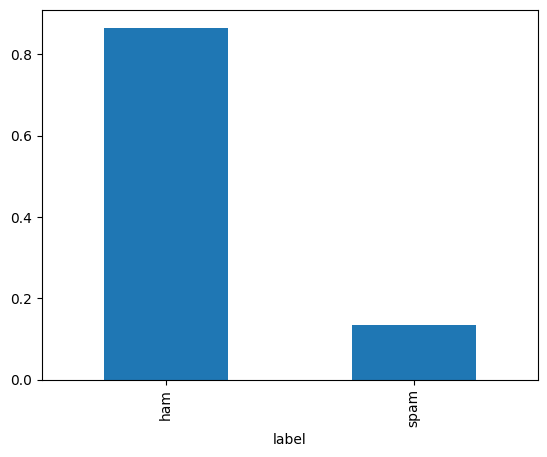

In [ ]:
# check target balance
data['label'].value_counts(normalize = True).plot.bar()

# Preprocessing Data

Pemrosesan data sebelum dimasukkan dalam machine learning. Pemrosesan dilakukan untuk membersihkan data. Pembersihan teks meliputi:
* Hapus semua karakter khusus
* Mengatur penggunaan huruf kecil untuk semua kata
* Tokenisasi, proses membagi teks menjadi unit-unit terkecil yang disebut dengan token, seperti dari kalimat menjadi kata
* Hapus kata-kata yang tidak mengandung makna penting (contoh : a, the, is, are)
* Lemmatisasi, yaitu mengubah kata menjadi bentuk dasarnya

In [ ]:
# download nltk
import nltk
nltk.download('all')

In [ ]:
# create a list text
text = list(data['text'])

In [ ]:
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [ ]:
# assign corpus to data['text']
data['text'] = corpus
data.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


# Split Data for Train Test

Pisahkan dataset menjadi data train dan data test sebelum ekstraksi fitur.

In [ ]:
# Create Feature and Label sets
X = data['text']
y = data['label']

# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3733,)
Testing Data :  (1839,)


# Feature Extraction

Di sini, digunakan model Bag of Words (CountVectorizer) untuk mengubah teks yang telah dibersihkan menjadi fitur numerik (bentuk angka). Hal ini diperlukan untuk melatih model machine learning.

In [ ]:
# Train Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3733, 5700)

# Training and Testing

Pada bagian ini, dilakukan pelatihan machine learning dengan **algoritma Logistic Regression** pada data teks sms yang telah di impor dan di proses. Selanjutnya, setelah dilatih dilakukan pengujian atau testing. Hasil testing digambarkan dalam confusion matrix.

In [ ]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

# Confusion Matrix

In [ ]:
# confusion matrix
import pandas as pd
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1600,2
spam,31,206
